Unique players - Distribution of left vs right (non-missing values):
plays
right-handed    1013
left-handed      133
Name: count, dtype: int64

Percentages:
plays
right-handed    88.39
left-handed     11.61
Name: count, dtype: float64

NaN percentage in 'plays': 56.66%
Saved distribution to c:\Users\mit\Desktop\Finaaal\reports\answers\q13_plays_distribution.csv
Saved figure to c:\Users\mit\Desktop\Finaaal\reports\figures\q13_plays_distribution.png


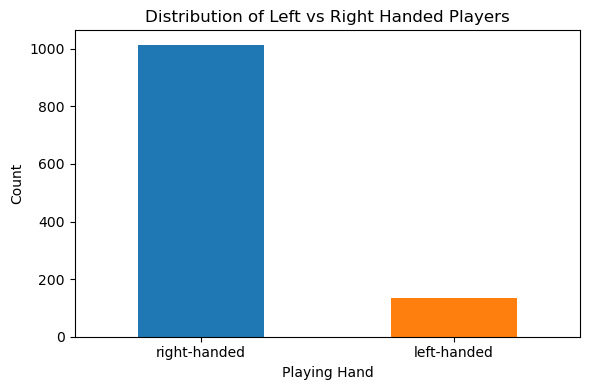

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

project_root = Path.cwd().parent
raw_dir = project_root / "data" / "raw"
answers_dir = project_root / "reports" / "answers"
figures_dir = project_root / "reports" / "figures"

answers_dir.mkdir(parents=True, exist_ok=True)
figures_dir.mkdir(parents=True, exist_ok=True)

file_path = raw_dir / "players.parquet"
df = pd.read_parquet(file_path)

df_unique = df.drop_duplicates(subset="player_id")

col = "plays"

counts = df_unique[col].value_counts(dropna=True)
percentages = counts / counts.sum() * 100
nan_pct = df_unique[col].isna().mean() * 100

print("Unique players - Distribution of left vs right (non-missing values):")
print(counts)
print("\nPercentages:")
print(percentages.round(2))
print(f"\nNaN percentage in '{col}': {nan_pct:.2f}%")

output_csv = answers_dir / "q13_plays_distribution.csv"
df_out = counts.reset_index()
df_out.columns = [col, "count"]
df_out["percentage"] = percentages.values
df_out.to_csv(output_csv, index=False, encoding="utf-8-sig")
print(f"Saved distribution to {output_csv}")

plt.figure(figsize=(6, 4))
counts.plot(kind="bar", color=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.title("Distribution of Left vs Right Handed Players")
plt.ylabel("Count")
plt.xlabel("Playing Hand")
plt.xticks(rotation=0)
plt.tight_layout()

output_fig = figures_dir / "q13_plays_distribution.png"
plt.savefig(output_fig, dpi=300)
print(f"Saved figure to {output_fig}")
plt.show()


امکان بدست اوردن اطلاعات دست بازیکنان در جای دیگری از داده ها نبود.  پر کردن با میانگین یا آمار ترکیبی در این بخش ممکنه باعث ایجاد اطلاعات غلط بشه بنابراین انجام نشد